#Тема 2. Свойства оценок.
##Задача 1 (к теоретической задаче 1).

In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Напишем функции для вычисления интересующих нас оценок

In [2]:
class Estimator:
    def __init__(self, function, tex_description):
        self.function = function
        self.tex_description = tex_description

In [3]:
teta_cup = []

$2\overline{X}$

In [4]:
teta_cup.append(
    Estimator(lambda sample: 2 * sample.mean(),
              r"$2\overline{X}$"))

$\overline{X} + X_{(n)}/2$

In [5]:
teta_cup.append(
    Estimator(lambda sample: sample.mean() + (sample.max() / 2),
              r"$\overline{X} + X_{(n)}/2$"))

$(n + 1) X_{(1)}$

In [6]:
teta_cup.append(
    Estimator(lambda sample: (len(sample) + 1) * sample.min(),
              r"$(n + 1) X_{(1)}$"))

$X_{(1)} +  X_{(n)}$

In [7]:
teta_cup.append(
    Estimator(lambda sample: sample.min() + sample.max(),
              r"$X_{(1)} +  X_{(n)}$"))

$\frac{n + 1}{n}X_{(n)}$

In [8]:
teta_cup.append(
    Estimator(lambda sample: (len(sample) + 1) / len(sample) * sample.max(),
              r"$\frac{n + 1}{n}X_{(n)}$"))

Генерируем выборку из равномерного распределения на отрезке [0, teta].

In [13]:
def gen_prefixes(some_list):
    prefixes = []
    for i in range(1, N + 1):
        prefixes.append(sample[0:i])
    return prefixes

In [10]:
def normalize(values, teta):
    return list(map(lambda x: abs(x - teta), values))

In [34]:
def draw_plot(sample, teta, estimators, plot_height):
    sample_prefixes = gen_prefixes(sample)
    plt.figure(figsize=(12, 5))
    plt.axis([0, len(sample), 0, plot_height])
    plt.rc('text', usetex=True)
    for estimator in estimators:
        plt.plot(normalize(map(estimator.function, sample_prefixes), teta),
                 label=estimator.tex_description)
    plt.legend()
    plt.show()

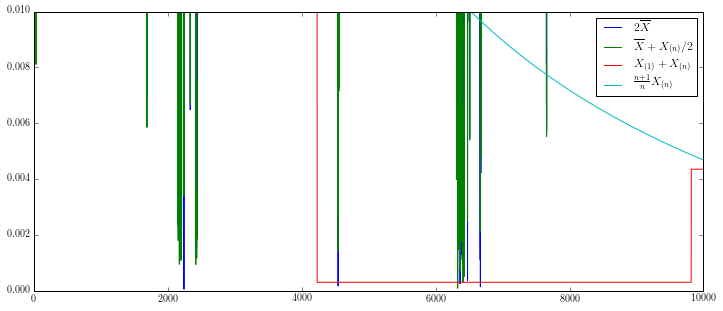

In [39]:
teta = 100
N = 10000
sample = sps.uniform.rvs(0, teta, N)
draw_plot(sample, teta, [teta_cup[0], teta_cup[1], teta_cup[3], teta_cup[4]], teta / N)